In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
!pip install tensorflow #open-source library for build  ML models and DL models by using  Python

In [4]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [5]:
from tensorflow.keras.datasets import mnist # dataset in ML
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print("First training label:", y_train[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
First training label: 5


In [4]:
# x_train

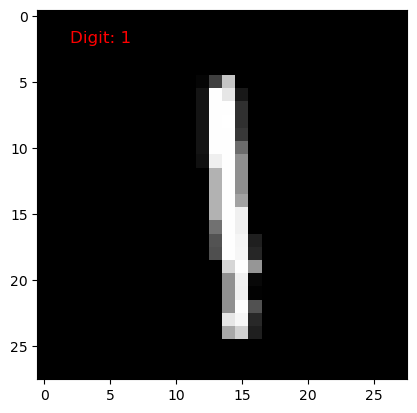

In [34]:
plt.imshow(x_train[8], cmap='gray')  # display the image from Numpy Array
plt.text(2, 2, f"Digit: {y_train[8]}", color='red', fontsize=12)
plt.show()

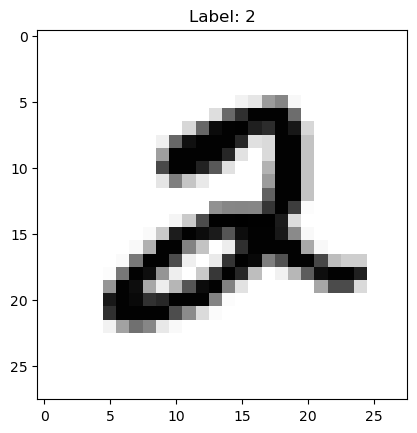

In [35]:
plt.imshow(x_train[5], cmap='gray_r') 
plt.title(f"Label: {y_train[5]}")
plt.show()

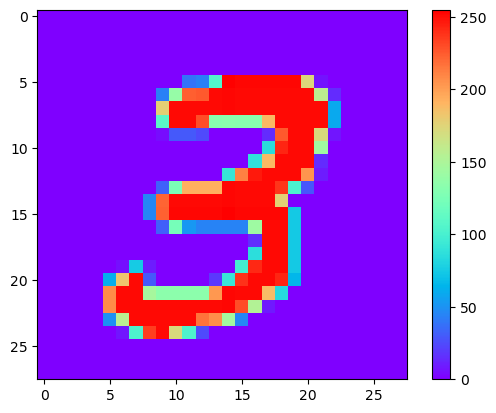

In [36]:
plt.imshow(x_train[7], cmap='rainbow')  
plt.colorbar()  
plt.show()

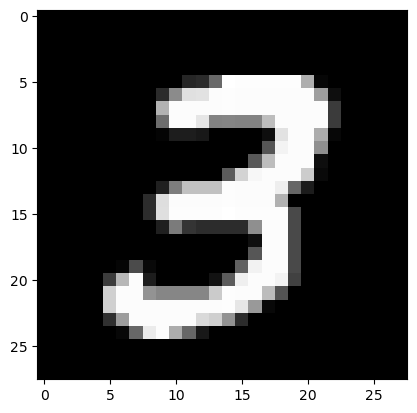

In [37]:
plt.imshow(x_train[7], cmap='gray')
plt.show()

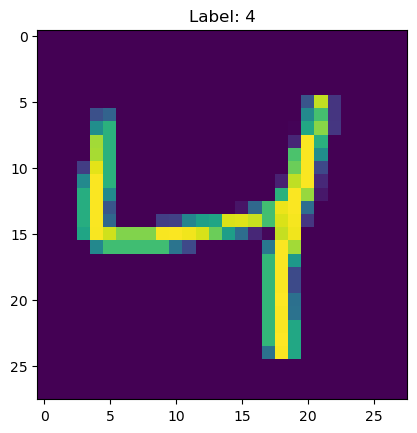

In [22]:
plt.imshow(x_train[2])
plt.title(f"Label: {y_train[2]}") 
plt.show()

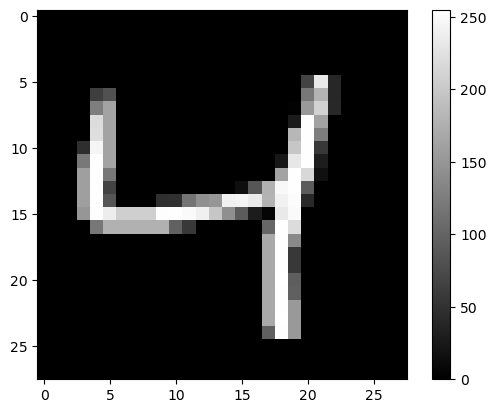

In [10]:
plt.imshow(x_train[2], cmap='grey')  
plt.colorbar() 
plt.show()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_test.shape

(10000, 28, 28)

In [47]:
# Build the CNN model 
model = models.Sequential([ #build a model step-by-step in a straight line
    layers.Conv2D(32, (3, 3),#Applies 32 convolution filters, each of size 3×3
          activation='relu', # helps prevent vanishing gradient.
          input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),#Reduces the spatial size by taking the maximum value in each 2×2 region.
    
    layers.Conv2D(64, (3, 3),
            activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),# Flattens used for the 2D feature maps into a 1D vector
    layers.Dense(64, activation='relu'),#Fully connected layer with 64 neurons
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])
model

<Sequential name=sequential_6, built=True>

In [44]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compile the model
model.compile(optimizer='adam',# How the model updates weights.
              loss='categorical_crossentropy',#How errors are measured.
              metrics=['accuracy'])# What we track during training.

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9942 - loss: 0.0184 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9893 - val_loss: 0.0322
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9965 - loss: 0.0111 - val_accuracy: 0.9907 - val_loss: 0.0280
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.9903 - val_loss: 0.0355
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9967 - loss: 0.0097 - val_accuracy: 0.9909 - val_loss: 0.0314


In [27]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9909 - loss: 0.0314
Test accuracy: 0.9909
